In [ ]:
#Import the Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("payments.csv")

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
df.shape

(28297, 11)

In [ ]:
df.isFraud.value_counts()

0.0    28212
1.0       84
Name: isFraud, dtype: int64

In [ ]:
df.type.value_counts()

PAYMENT     13913
CASH_OUT     6109
CASH_IN      5027
TRANSFER     2735
DEBIT         513
Name: type, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28297 entries, 0 to 28296
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            28297 non-null  int64  
 1   type            28297 non-null  object 
 2   amount          28297 non-null  float64
 3   nameOrig        28297 non-null  object 
 4   oldbalanceOrg   28297 non-null  float64
 5   newbalanceOrig  28297 non-null  float64
 6   nameDest        28297 non-null  object 
 7   oldbalanceDest  28297 non-null  float64
 8   newbalanceDest  28297 non-null  float64
 9   isFraud         28296 non-null  float64
 10  isFlaggedFraud  28296 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 2.4+ MB


In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,28297.000000,2.829700e+04,2.829700e+04,2.829700e+04,2.829700e+04,2.829700e+04,28296.000000,28296.0
mean,6.508252,1.357405e+05,7.667026e+05,7.823551e+05,8.483811e+05,1.191306e+06,0.002969,0.0
std,2.291090,3.013167e+05,2.126123e+06,2.166615e+06,2.513869e+06,3.106440e+06,0.054405,0.0
min,1.000000,1.770000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,6.000000,5.966520e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,8.000000,1.950669e+04,1.963654e+04,3.682140e+03,0.000000e+00,0.000000e+00,0.000000,0.0
75%,8.000000,1.601022e+05,1.386575e+05,1.407606e+05,3.654323e+05,6.670935e+05,0.000000,0.0
max,8.000000,1.000000e+07,2.235231e+07,2.246600e+07,2.495524e+07,2.878359e+07,1.000000,0.0


In [ ]:
df.isnull().any()

step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud            True
isFlaggedFraud     True
dtype: bool

In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           1
isFlaggedFraud    1
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().any()

step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

In [ ]:
df.shape

(28296, 11)

In [ ]:
corr=df.corr()
corr

<ipython-input-16-7d5195e2bf4d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.072190,-0.041729,-0.042128,-0.000994,0.027308,-0.047829,NaN
amount,0.072190,1.000000,0.037237,0.022196,0.320885,0.428225,0.081981,NaN
oldbalanceOrg,-0.041729,0.037237,1.000000,0.997933,0.144480,0.109216,-0.004231,NaN
newbalanceOrig,-0.042128,0.022196,0.997933,1.000000,0.148961,0.110357,-0.018826,NaN
oldbalanceDest,-0.000994,0.320885,0.144480,0.148961,1.000000,0.918069,-0.013884,NaN
newbalanceDest,0.027308,0.428225,0.109216,0.110357,0.918069,1.000000,-0.008683,NaN
isFraud,-0.047829,0.081981,-0.004231,-0.018826,-0.013884,-0.008683,1.000000,NaN
isFlaggedFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

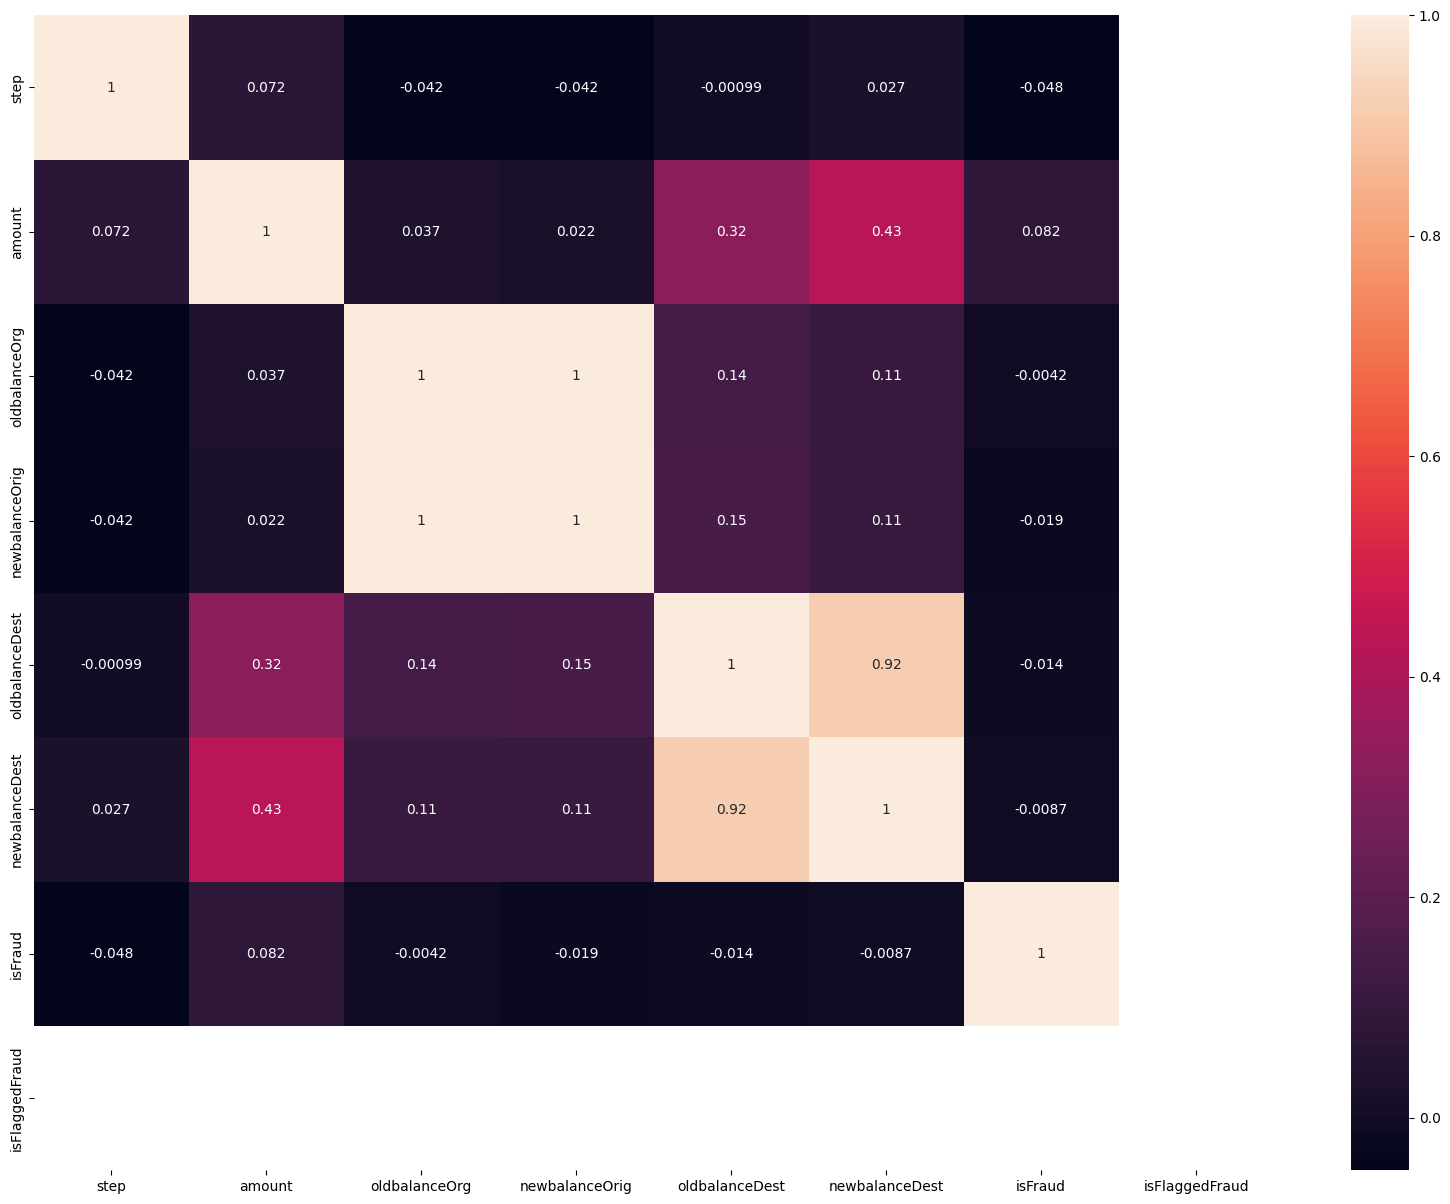

In [ ]:
plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True)

In [ ]:
#sns.distplot(df["type"])

<ipython-input-19-2de1b2bf521f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["isFraud"])


<Axes: xlabel='isFraud', ylabel='Density'>

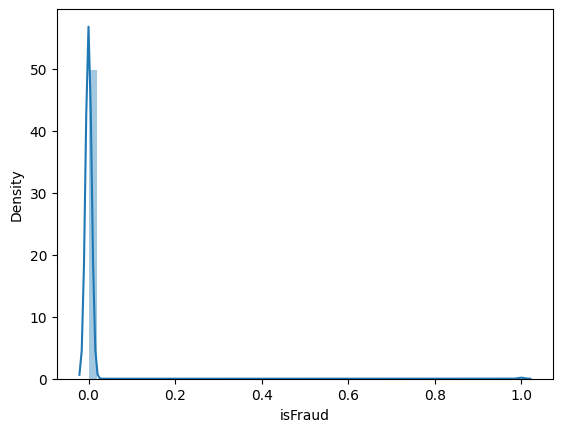

In [ ]:
sns.distplot(df["isFraud"])

In [ ]:
df = df.drop(['isFlaggedFraud','nameOrig','nameDest'], axis=1)

In [ ]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0.0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0.0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1.0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1.0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0.0


In [ ]:
#lable encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.type=le.fit_transform(df.type)
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0.0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0.0
2,1,4,181.00,181.0,0.00,0.0,0.0,1.0
3,1,1,181.00,181.0,0.00,21182.0,0.0,1.0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0.0


In [ ]:
df.type.value_counts()

3    13913
1     6108
0     5027
4     2735
2      513
Name: type, dtype: int64

outlayer detection

<Axes: >

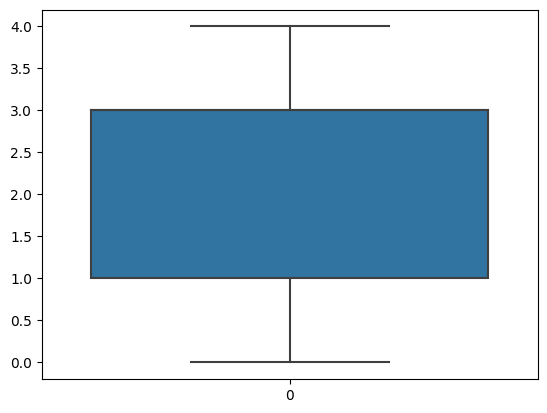

In [ ]:
sns.boxplot(df.type)

splitting of data

In [ ]:
x=df.drop(['isFraud'], axis=1)
x.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,3,9839.64,170136.0,160296.36,0.0,0.0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0
2,1,4,181.00,181.0,0.00,0.0,0.0
3,1,1,181.00,181.0,0.00,21182.0,0.0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0.0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0.0
2,1,4,181.00,181.0,0.00,0.0,0.0,1.0
3,1,1,181.00,181.0,0.00,21182.0,0.0,1.0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0.0


#feature scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
x=pd.DataFrame(ms.fit_transform(x),columns=x.columns)
x.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,0.0,0.75,0.000984,0.007612,0.007135,0.000000,0.0
1,0.0,0.75,0.000186,0.000951,0.000863,0.000000,0.0
2,0.0,1.00,0.000018,0.000008,0.000000,0.000000,0.0
3,0.0,0.25,0.000018,0.000008,0.000000,0.000849,0.0
4,0.0,0.75,0.001167,0.001859,0.001330,0.000000,0.0


In [ ]:
y=df['isFraud']
y.head()

0    0.0
1    0.0
2    1.0
3    1.0
4    0.0
Name: isFraud, dtype: float64

In [ ]:
x.shape, y.shape

((28296, 7), (28296,))

splitting data intlo train and test

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((22636, 7), (5660, 7), (22636,), (5660,))

#model building

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score as ras,roc_curve


In [ ]:
models = [ RandomForestClassifier(), DecisionTreeClassifier(),
          LogisticRegression(),XGBClassifier(),SVC(probability=True)]

for i in range(len(models)):
	models[i].fit(x_train, y_train)
	print(f'{models[i]} : ')

	y_train_predict = models[i].predict_proba(x_train)[:, 1]
	print('traning Accuracy : ', ras(y_train, y_train_predict))

	y_test_accuracy = models[i].predict_proba(x_test)[:, 1]
	print('testing Accuracy : ', ras(y_test, y_test_accuracy))
	print()




RandomForestClassifier() : 
traning Accuracy :  1.0
testing Accuracy :  0.9721680553093422

DecisionTreeClassifier() : 
traning Accuracy :  1.0
testing Accuracy :  0.815257653085026

LogisticRegression() : 
traning Accuracy :  0.7670625683739857
testing Accuracy :  0.7923847022271153

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_

#saving ths svm model as we are getting better accuracy

In [ ]:
svc_model = SVC(probability = True)
svc_model.fit(x_train, y_train)

y_test_predict = svc_model.predict(x_test)

accuracy = accuracy_score(y_test, y_test_predict)
print(accuracy)

confusion = confusion_matrix(y_test, y_test_predict)
print('Confusion Matrix:')
print(confusion)

report_svc = classification_report(y_test, y_test_predict)
print('\nClassification Report (SVC):\n', report_svc)

0.9968197879858657
Confusion Matrix:
[[5641    0]
 [  18    1]]

Classification Report (SVC):
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5641
         1.0       1.00      0.05      0.10        19

    accuracy                           1.00      5660
   macro avg       1.00      0.53      0.55      5660
weighted avg       1.00      1.00      1.00      5660



In [ ]:
import pickle
pickle.dump(svc_model, open('model.pkl','wb'))
pickle.dump(le, open('label_encoder.pk1','wb'))
pickle.dump(ms, open('scaler.pkl','wb'))

In [ ]:
x.head()


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,0.0,0.75,0.000984,0.007612,0.007135,0.000000,0.0
1,0.0,0.75,0.000186,0.000951,0.000863,0.000000,0.0
2,0.0,1.00,0.000018,0.000008,0.000000,0.000000,0.0
3,0.0,0.25,0.000018,0.000008,0.000000,0.000849,0.0
4,0.0,0.75,0.001167,0.001859,0.001330,0.000000,0.0


In [ ]:
svc_model.predict(ms.transform([[1,1,181.00,181.0,0.00,21182.0,0.0]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0.])